In [1]:
import numpy as np
from scipy.ndimage import zoom
from skimage.transform import rescale
import matplotlib.pyplot as plt
import tifffile
import os

In [2]:

# specify directory path
directory_path = "/nsls2/data/staff/xyang4/data/diffraction_ruipeng/RLi_sbcc_saxs/stitched2/"
save_path = "/nsls2/data/staff/xyang4/data/diffraction_ruipeng/RLi_sbcc_saxs/crop_20240624/"

# specify crop parameters
center_x = 732
center_y = 1126
crop_width = 512
crop_height = 512


def img_bin(img, ratio):
    return rescale(img, ratio)
# for filename in os.listdir(directory_path):
#     if "_cropped" in filename:
#         os.remove(os.path.join(directory_path, filename))
#         print(f'Removed file {filename}')
def save_tiff(image, filename):
    # Extract the directory from the filename
    directory = os.path.dirname(filename)

    # Check if the directory exists, and create it if it doesn't
    if not os.path.exists(directory):
        os.makedirs(directory)
    # image = nor_diff(image)
    image = np.array(image, dtype = np.float32)
    # Save the image
    tifffile.imwrite(filename, image)
# loop through files in directory and crop TIFF files
for filename in os.listdir(directory_path):
    if filename.endswith(".tif") or filename.endswith(".tiff"):
        # read TIFF file
        tiff_file = tifffile.imread(os.path.join(directory_path, filename))
        
        # crop image to desired size and center position using numpy
        left = center_x - crop_width
        right = center_x + crop_width
        top = center_y - crop_height
        bottom = center_y + crop_height
        cropped_image = tiff_file[top:bottom, left:right]
        # binned_image = img_bin(cropped_image, 0.25)
        # save cropped image
        # cropped_image_filename = os.path.splitext(filename)[0] + "_cropped" + os.path.splitext(filename)[1]
        cropped_image_filename = os.path.splitext(filename)[0][-20:-14] + ".tiff"
        # print(cropped_image_filename)
        tifffile.imwrite(os.path.join(save_path, cropped_image_filename), cropped_image)
# 

tf.Tensor(
[[ 0.0000000e+00+3136.j       2.2264750e-05-2006.9552j
   0.0000000e+00   +0.j      ...  2.7772541e-05 +698.11426j
   0.0000000e+00   +0.j      -1.0768243e-05-2006.9551j ]
 [-5.6184326e-05-2006.9556j  -9.9926274e-06+1284.3965j
   0.0000000e+00   +0.j      ... -2.8981940e-05 -446.7721j
   0.0000000e+00   +0.j       3.8348408e-06+1284.3965j ]
 [ 0.0000000e+00   +0.j       0.0000000e+00   +0.j
   0.0000000e+00   +0.j      ...  0.0000000e+00   +0.j
   0.0000000e+00   +0.j       0.0000000e+00   +0.j     ]
 ...
 [ 1.1060868e-05 +698.11426j -5.4934626e-06 -446.77203j
   0.0000000e+00   +0.j      ...  1.3999386e-05 +155.40237j
   0.0000000e+00   +0.j       5.0130293e-06 -446.772j  ]
 [ 0.0000000e+00   +0.j       0.0000000e+00   +0.j
   0.0000000e+00   +0.j      ...  0.0000000e+00   +0.j
   0.0000000e+00   +0.j       0.0000000e+00   +0.j     ]
 [ 5.8149319e-05-2006.9553j  -2.5600180e-05+1284.3964j
   0.0000000e+00   +0.j      ... -8.2000997e-06 -446.7721j
   0.0000000e+00   +0.j     

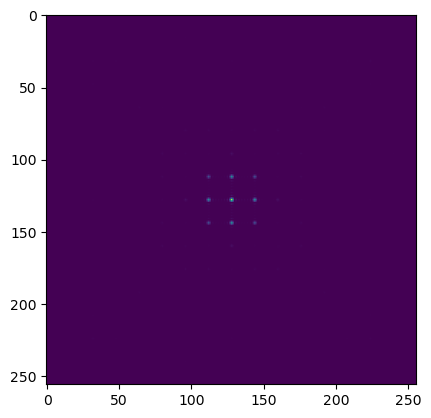

In [ ]:
import tensorflow as tf

image_data = tf.cast(img, tf.float32)
image_data = image_data/255.0
# Create a tensor with your image data
f = tf.complex(tf.zeros((tf.shape(image_data))), image_data)

# Perform Fourier Transform
f = tf.signal.fft2d(f)
print(f)
# Shift the zero frequency component to the center of the spectrum
f_shifted = tf.signal.fftshift(f)

# Calculate the magnitude spectrum and normalize it to values between 0 and 255
magnitude_spectrum = tf.math.square(tf.math.abs(f_shifted))
# magnitude_spectrum_normalized = tf.image.per_image_standardization(magnitude_spectrum)

# Display the magnitude spectrum
import matplotlib.pyplot as plt
plt.imshow(magnitude_spectrum.numpy())
plt.show()


In [ ]:
for i in 

In [2]:
data = tifffile.imread('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/SAXS_Au_SL_s3_scan1_id841_x1.145_y21.50015saxs.tiff')

In [3]:
mask = tifffile.imread('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/Pilatus1M_custom-mask.tif')

In [4]:
data1  = data[512-128:512+128, 248-128:248+128]
mask2 = mask[512-128:512+128, 248-128:248+128]
print(data.shape, data1.shape)

(1043, 981) (256, 256)


In [8]:
data1 = np.load('/data/diffraction_ruipeng/x_scale.npy')
print(data1)

0.0007082688570101553


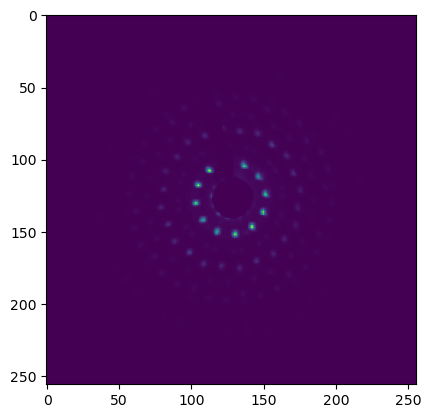

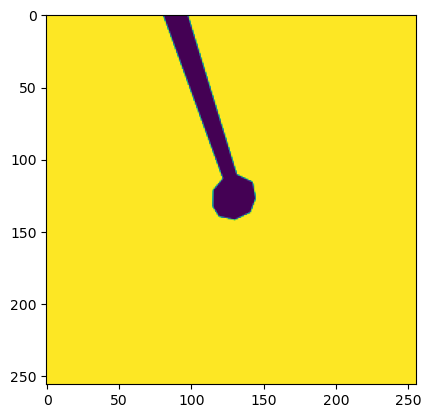

In [5]:
plt.imshow(data1)
plt.show()
plt.imshow(mask2)
plt.show()


In [12]:
tifffile.imwrite('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/data_crop_nor.tiff', data1)
tifffile.imwrite('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/mask_crop_nor.tiff', mask2)

In [3]:
import numpy as np
import cv2

# Generate 256x256 grayscale image
img = np.zeros((256, 256), dtype=np.uint8)

# Set diameter and radius of sphere
diameter = 8
radius = diameter // 2

# Draw 16x16 spheres
for i in range(16):
    for j in range(16):
        # Calculate center of sphere
        center = ((i+1)*16 - 8, (j+1)*16 - 8)
        
        # Generate mask for sphere
        mask = np.zeros((256, 256), dtype=np.uint8)
        cv2.circle(mask, center, radius, 255, -1)
        
        # Add mask to image
        img = cv2.add(img, mask)
# tifffile.imwrite('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/sim_circles.tif', img)      
# Display image
# cv2.imshow('Image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
tifffile.imwrite('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/sim_circles.tif', img)

# Save image as TIFF file


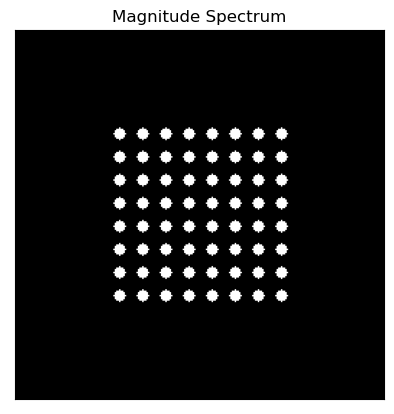

(799680+0j) (-581981.6891156639+0j)


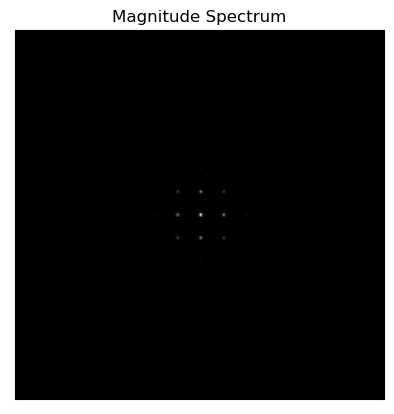

In [3]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Generate the image with spheres using the code from the previous example


# Initialize a black image of size 128 by 128
img = np.zeros((128, 128), dtype=np.uint8)

# Draw 8*8 spheres with a diameter of 8 pixels
diameter = 8
radius = diameter // 2
for i in range(8):
    for j in range(8):
        center = ((i+1)*16 - 8, (j+1)*16 - 8)
        mask = np.zeros((128, 128), dtype=np.uint8)
        cv2.circle(mask, center, radius, 255, -1)
        img = cv2.add(img, mask)

# Pad the image to size 256 by 256
img = cv2.copyMakeBorder(img, 64, 64, 64, 64, cv2.BORDER_CONSTANT, value=0)
plt.imshow(img, cmap='gray')
# plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
tifffile.imwrite('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/sim_circles.tif', img)


# Compute 2D Fourier transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fft_img = (np.abs(fshift))**2
# magnitude_spectrum = np.log(np.abs(fshift))
print(fshift.max(), fshift.min())
# Display magnitude spectrum
plt.imshow(fft_img, cmap='gray')
# plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
tifffile.imwrite('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/sim_fft.tif', fft_img)


In [9]:
data = tifffile.imread('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/test.tiff')
data = complex(0, data)
f = np.fft.fft2(data)
fshift = np.fft.fftshift(f)
fft_img = (np.abs(fshift))**2
plt.imshow(fft_img, cmap='gray')
# plt.imshow(magnitude_spectrum, cmap='gray')
# plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

In [6]:
tifffile.imwrite('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/data_fft.tif', fft_img)

tf.Tensor(
[[ 0.0000000e+00+3136.j       2.2264750e-05-2006.9552j
   0.0000000e+00   +0.j      ...  2.7772541e-05 +698.11426j
   0.0000000e+00   +0.j      -1.0768243e-05-2006.9551j ]
 [-5.6184326e-05-2006.9556j  -9.9926274e-06+1284.3965j
   0.0000000e+00   +0.j      ... -2.8981940e-05 -446.7721j
   0.0000000e+00   +0.j       3.8348408e-06+1284.3965j ]
 [ 0.0000000e+00   +0.j       0.0000000e+00   +0.j
   0.0000000e+00   +0.j      ...  0.0000000e+00   +0.j
   0.0000000e+00   +0.j       0.0000000e+00   +0.j     ]
 ...
 [ 1.1060868e-05 +698.11426j -5.4934626e-06 -446.77203j
   0.0000000e+00   +0.j      ...  1.3999386e-05 +155.40237j
   0.0000000e+00   +0.j       5.0130293e-06 -446.772j  ]
 [ 0.0000000e+00   +0.j       0.0000000e+00   +0.j
   0.0000000e+00   +0.j      ...  0.0000000e+00   +0.j
   0.0000000e+00   +0.j       0.0000000e+00   +0.j     ]
 [ 5.8149319e-05-2006.9553j  -2.5600180e-05+1284.3964j
   0.0000000e+00   +0.j      ... -8.2000997e-06 -446.7721j
   0.0000000e+00   +0.j     

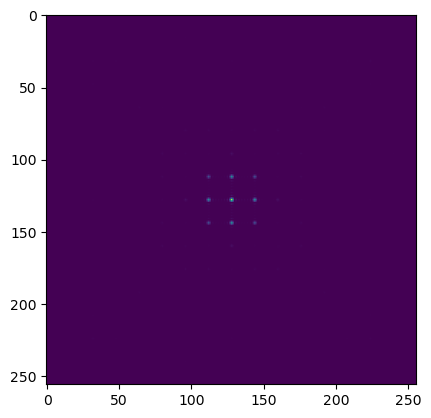

In [15]:
import tensorflow as tf

image_data = tf.cast(img, tf.float32)
image_data = image_data/255.0
# Create a tensor with your image data
f = tf.complex(tf.zeros((tf.shape(image_data))), image_data)

# Perform Fourier Transform
f = tf.signal.fft2d(f)
print(f)
# Shift the zero frequency component to the center of the spectrum
f_shifted = tf.signal.fftshift(f)

# Calculate the magnitude spectrum and normalize it to values between 0 and 255
magnitude_spectrum = tf.math.square(tf.math.abs(f_shifted))
# magnitude_spectrum_normalized = tf.image.per_image_standardization(magnitude_spectrum)

# Display the magnitude spectrum
import matplotlib.pyplot as plt
plt.imshow(magnitude_spectrum.numpy())
plt.show()


(3198720+0j) (-2327926.7564626555+0j)


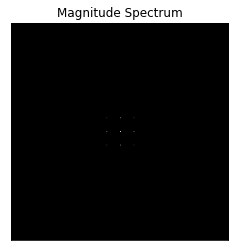

In [ ]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Generate the image with spheres using the code from the previous example
img = np.zeros((256, 256), dtype=np.uint8)
diameter = 8
radius = diameter // 2
for i in range(16):
    for j in range(16):
        center = ((i+1)*16 - 8, (j+1)*16 - 8)
        mask = np.zeros((256, 256), dtype=np.uint8)
        cv2.circle(mask, center, radius, 255, -1)
        img = cv2.add(img, mask)

# Compute 2D Fourier transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
fft_img = (np.abs(fshift))**2
# magnitude_spectrum = np.log(np.abs(fshift))
print(fshift.max(), fshift.min())
# Display magnitude spectrum
plt.imshow(fft_img, cmap='gray')
# plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()
tifffile.imwrite('/nsls2/data/staff/xyang4/data/diffraction_ruipeng/sim_fft.tif', fft_img)


In [11]:
wf = tf.complex(absorption, phase)
    # wf = tf.complex(phase, absorption)

    # wf = mask_img(wf)
    # wf = tf.multiply(ampl, tf.exp(phshift))
    # wf = tf.manip.roll(wf, [160, 160], [0, 1])
    ifp = tf.square(tf.abs(tf.signal.fft2d(wf)))
    # ifp = tf.roll(ifp, [256, 256], [0, 1])
    ifp = tf.reshape(ifp, [1, ifp.shape[0], ifp.shape[1], 1])
    ifp = tf.image.per_image_standardization(ifp)
    ifp = tfnor_phase(ifp)

# Tomography reconstruction

In [1]:
import numpy as np
import tomopy
import tifffile
import matplotlib.pyplot as plt
from pathlib import Path
import os

In [2]:
fpath = '/nsls2/data/staff/xyang4/data/diffraction_ruipeng/RLi_sbcc_saxs/crop_recon_20240624/'
spath = '/nsls2/data/staff/xyang4/data/diffraction_ruipeng/RLi_sbcc_saxs/crop_tomo_20240624/'

In [3]:
def list_files(directory):
    path = Path(directory)
    for file_path in path.rglob('*'):
        yield file_path

def save_tiff(image, filename):
    # Extract the directory from the filename
    directory = os.path.dirname(filename)

    # Check if the directory exists, and create it if it doesn't
    if not os.path.exists(directory):
        os.makedirs(directory)
    image = nor_diff(image)
    image = np.array(image, dtype = np.float32)
    # Save the image
    tifffile.imwrite(filename, image)
    
def nor_diff(img):
 
    # img = np.log(img+2)
    mean_tmp = np.mean(img)
    std_tmp = np.std(img)
    img = (img - mean_tmp) / std_tmp
    img = (img - img.min()) / (img.max() - img.min())
    return img

def nor_prj(img):
    # nang, px = img.shape
    mean_sum = np.mean(np.sum(img, axis=(1,2)))
    data_corr = np.zeros_like(img)
    for i in range(len(img)):
        data_corr[i, :, :] = img[i, :, :] * mean_sum / np.sum(img[i, :, :])
    return data_corr

In [4]:
data = []
for file_name in list_files(fpath):
    data_tmp = tifffile.imread(file_name)
    data.append(data_tmp)
data = np.array(data)
print(data.shape)

(361, 1024, 1024)


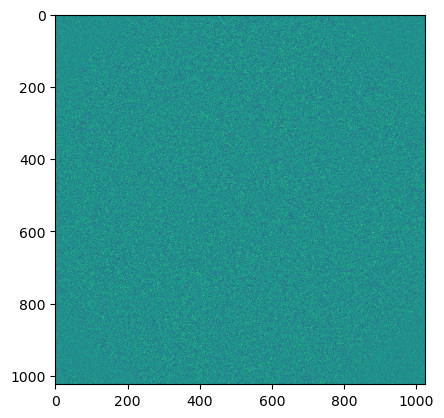

In [5]:
ang = tomopy.angles(361, ang1 = 0, ang2 = 180)
data = nor_prj(data)
# data_pad = np.zeros((361, 1024, 1024))
# data_pad[:, :, 54:-54] = data
recon = tomopy.recon(data, ang, algorithm='ospml_hybrid', num_iter=50)
plt.imshow(recon[100,:,:])
plt.show()

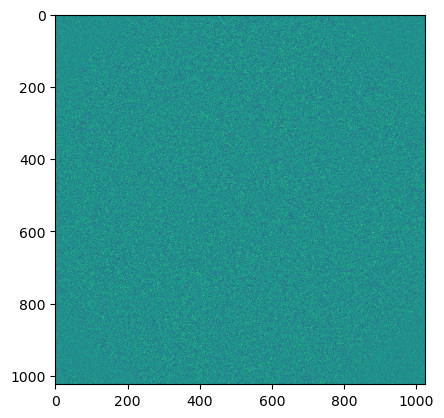

In [10]:
plt.imshow(recon[800,:,:])
plt.show()

In [6]:
save_tiff(recon, spath+'recon_pml.tiff')